In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (200,10)
# !pip install xgboost
# !pip install lightgbm
# !pip install imblearn
# !pip install borutashap
# !pip install eli5

In [2]:
time_table = pd.read_csv('Survival_time_event.csv', index_col=0)
clinic_table = pd.read_csv('Clinical_Variables.csv', index_col=0)
genetic_table = pd.read_csv('Genetic_alterations.csv', index_col=0)
survival_treatment_table = pd.read_csv('Label.csv', index_col=0)

In [3]:
'''
Correlating numerical features of Time data

- outlier value drop
'''

print('outlier of time: ')
print(time_table.loc[time_table['time'] < 0, 'time'], end='\n\n')

time_table_outlier = time_table.copy()
time_table_outlier.loc[time_table_outlier['time'] < 0, 'time'] = abs(time_table_outlier.loc[time_table_outlier['time'] < 0, 'time'])
print(time_table_outlier.describe(), end='\n\n')

outlier of time: 
905   -7.945621
Name: time, dtype: float64

              time        event
count  1000.000000  1000.000000
mean     51.876125     0.891000
std      22.122689     0.311795
min       7.070708     0.000000
25%      37.401307     1.000000
50%      47.064712     1.000000
75%      60.966476     1.000000
max     217.078908     1.000000



In [4]:
'''
Correlating numerical features of Clinic data

- outlier value drop
'''

clinic_table_outlier = clinic_table.copy()

# drop outlier
for col in clinic_table_outlier.columns:
    for outlier in range(10,13):
        clinic_table_outlier = clinic_table_outlier.replace(outlier, 9)

# visualize
for col in clinic_table_outlier.columns:
    print('#', col)
    print(clinic_table_outlier[col].value_counts())
    print('-'*20)

# Var1
2    235
3    204
1    171
4    139
5     95
0     57
6     50
7     27
8     13
9      9
Name: Var1, dtype: int64
--------------------
# Var2
3    221
2    218
4    163
1    113
5    109
6     65
0     48
7     30
9     20
8     13
Name: Var2, dtype: int64
--------------------
# Var3
2    260
3    196
1    156
4    130
5     97
0     55
6     55
7     23
8     16
9     12
Name: Var3, dtype: int64
--------------------
# Var4
2    242
3    195
1    150
4    140
5    106
6     67
0     36
7     32
8     16
9     16
Name: Var4, dtype: int64
--------------------
# Var5
2    247
3    223
4    161
5    124
1     76
6     63
7     41
0     28
9     19
8     18
Name: Var5, dtype: int64
--------------------
# Var6
2    240
3    212
4    128
1    127
5     99
6     64
0     53
7     40
8     20
9     17
Name: Var6, dtype: int64
--------------------
# Var7
1    269
2    208
3    144
0    128
4    118
5     62
6     47
7     16
8      6
9      2
Name: Var7, dtype: int64
--------------------

In [5]:
'''
Correlating numerical features of Clinic data

- normalization
'''

clinic_table_normalization = clinic_table_outlier.copy()

# normalization
for col in clinic_table_normalization.columns:
    clinic_table_normalization[col] = (clinic_table_normalization[col] + 1)/10.0
    
# visualize
for col in clinic_table_normalization.columns:
    print('#', col)
    print(clinic_table_normalization[col].value_counts())
    print('-'*20)    

# Var1
0.3    235
0.4    204
0.2    171
0.5    139
0.6     95
0.1     57
0.7     50
0.8     27
0.9     13
1.0      9
Name: Var1, dtype: int64
--------------------
# Var2
0.4    221
0.3    218
0.5    163
0.2    113
0.6    109
0.7     65
0.1     48
0.8     30
1.0     20
0.9     13
Name: Var2, dtype: int64
--------------------
# Var3
0.3    260
0.4    196
0.2    156
0.5    130
0.6     97
0.1     55
0.7     55
0.8     23
0.9     16
1.0     12
Name: Var3, dtype: int64
--------------------
# Var4
0.3    242
0.4    195
0.2    150
0.5    140
0.6    106
0.7     67
0.1     36
0.8     32
0.9     16
1.0     16
Name: Var4, dtype: int64
--------------------
# Var5
0.3    247
0.4    223
0.5    161
0.6    124
0.2     76
0.7     63
0.8     41
0.1     28
1.0     19
0.9     18
Name: Var5, dtype: int64
--------------------
# Var6
0.3    240
0.4    212
0.5    128
0.2    127
0.6     99
0.7     64
0.1     53
0.8     40
0.9     20
1.0     17
Name: Var6, dtype: int64
--------------------
# Var7
0.2    269
0.3 

In [6]:
'''
Correlating numerical features of Genetic data

- normalization
'''
genetic_table_normalization = genetic_table.copy()

# normalization
for col in genetic_table_normalization.columns:
    genetic_table_normalization[col] -= 0.5
    
    
print(genetic_table_normalization.head(10))

    G1   G2   G3   G4   G5   G6   G7   G8   G9  G10  ...  G291  G292  G293  \
0 -0.5  0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5  ...  -0.5  -0.5  -0.5   
1 -0.5  0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5  ...  -0.5  -0.5  -0.5   
2 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5  ...  -0.5  -0.5  -0.5   
3 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5  0.5 -0.5  0.5  ...  -0.5   0.5  -0.5   
4 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5  ...  -0.5  -0.5  -0.5   
5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5  ...  -0.5  -0.5  -0.5   
6 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5  ...  -0.5  -0.5  -0.5   
7 -0.5 -0.5 -0.5  0.5 -0.5 -0.5 -0.5 -0.5 -0.5  0.5  ...  -0.5  -0.5  -0.5   
8 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5  ...  -0.5  -0.5  -0.5   
9 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5  ...  -0.5  -0.5  -0.5   

   G294  G295  G296  G297  G298  G299  G300  
0  -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  
1  -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  
2  

In [7]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
import lightgbm as lgb

In [416]:
def TestML(model,selected_genetic):
    train_acc = []
    test_acc = []
    for i in range(20):
        genetic_10 = genetic_table_normalization.copy()
        genetic_10 = genetic_10[selected_genetic]

        input_dataset = pd.concat([survival_treatment_table, time_table_outlier, clinic_table_normalization ,genetic_10], axis=1)
        input_dataset = input_dataset.drop(['event'], axis=1)

        all_index = np.arange(1000)
        train_data, test_data = input_dataset.iloc[all_index[:800],:], input_dataset.iloc[all_index[800:1000],:]
        X_train = train_data.drop(['newlabel'], axis=1)
        Y_train = train_data['newlabel']

        X_test = test_data.drop(['newlabel'], axis=1)
        Y_test = test_data['newlabel']

        model.fit(X_train, Y_train)
        train_acc.append(np.round(model.score(X_train, Y_train) * 100, 10))
        
        Y_pred = model.predict(X_test)
        test_acc.append(np.round(accuracy_score(Y_test, Y_pred), 10))
        
        
    print('## Train 정확도: ', np.round(np.max(train_acc), 3), np.round(np.min(train_acc), 3))
    print('## Test 정확도: ', np.round(np.max(test_acc),3), np.round(np.min(test_acc),3))
    print()
    
    return train_acc, test_acc

In [267]:
selected_genetic = ['G211', 'G179', 'G80', 'G27', 'G147', 'G139', 'G242', 'G264', 'G290', 'G130']

print('## test_model1 (Train accuracy가 100인 경우의 모델)')
model1_train, model1_test = TestML(test_model1, selected_genetic)

print('## test_model2 (Train accuracy가 100이 아닌 경우의 모델)')
model2_train, model2_test = TestML(test_model2, selected_genetic)

## test_model1 (Train accuracy가 100인 경우의 모델)
## Train 정확도:  100.0 100.0
## Test 정확도:  0.65 0.56

## test_model2 (Train accuracy가 100이 아닌 경우의 모델)
## Train 정확도:  92.75 92.75
## Test 정확도:  0.63 0.63



In [444]:
test_model1 = RandomForestClassifier(n_estimators=60)
test_model2 = lgb.LGBMClassifier(n_estimators=32,num_leaves=64,n_jobs=-1,boost_from_average=False)

In [446]:
print('## test_model2 (Train accuracy가 100이 아닌 경우의 모델)')
model2_train, model2_test = TestML(test_model2, selected_genetic)

## test_model2 (Train accuracy가 100이 아닌 경우의 모델)
## Train 정확도:  94.25 94.25
## Test 정확도:  0.63 0.63



In [447]:
model_train_results = np.array([[np.round(np.max(model1_train), 3), np.round(np.min(model1_train), 3)],
                               [np.round(np.max(model1_test), 3),np.round(np.min(model1_test), 3)]])

display(pd.DataFrame(model_train_results, columns=['Max', 'Min'],
                     index=['RandomForest Train', 'RandomForest Test']))

,Max,Min
RandomForest Train,100.00,100.000
RandomForest Test,0.65,0.565


In [412]:
model_train_results = np.array([[np.round(np.max(model1_train), 3), np.round(np.min(model1_train), 3)],
                               [np.round(np.max(model1_test), 3),np.round(np.min(model1_test), 3)],
                               [np.round(np.max(model2_train), 3),np.round(np.min(model2_train), 3)],
                               [np.round(np.max(model2_test), 3),np.round(np.min(model2_test), 3)]])

display(pd.DataFrame(model_train_results, columns=['Max', 'Min'],
                     index=['RandomForest Train', 'RandomForest Test','LightGBM Train','LightGBM Test']))

,Max,Min
RandomForest Train,100.000,100.000
RandomForest Test,0.650,0.565
LightGBM Train,89.250,89.250
LightGBM Test,0.635,0.635


In [268]:

print(model1_train)
print(model1_test)
print(model2_train)
print(model2_test)

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[0.585, 0.565, 0.6, 0.57, 0.565, 0.59, 0.605, 0.58, 0.585, 0.605, 0.575, 0.575, 0.575, 0.6, 0.585, 0.595, 0.575, 0.615, 0.58, 0.65]
[92.75, 92.75, 92.75, 92.75, 92.75, 92.75, 92.75, 92.75, 92.75, 92.75, 92.75, 92.75, 92.75, 92.75, 92.75, 92.75, 92.75, 92.75, 92.75, 92.75]
[0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63]


In [56]:
# '''
# 20번 돌린 것을 100번 돌린 경우

# '''
# selected_genetic = ['G211', 'G179', 'G80', 'G27', 'G147', 'G139', 'G242', 'G264', 'G290', 'G130']


# print('## test_model1 (Train accuracy가 100인 경우의 모델)')
# train_result, test_result = [], []
# for i in range(100):
#     tmp1, tmp2 = TestML(test_model1, selected_genetic)
#     train_result.extend(tmp1)
#     test_result.extend(tmp2)
    
# print('## Train 평균 정확도: ', np.round(np.mean(train_result), 3))
# print('## Test 평균 정확도: ', np.round(np.mean(test_result),3))
# print()

# print('## test_model2 (Train accuracy가 100이 아닌 경우의 모델)')
# train_result, test_result = [], []
# for i in range(100):
#     tmp1, tmp2 = TestML(test_model2, selected_genetic)
#     train_result.extend(tmp1)
#     test_result.extend(tmp2)
    
# print('## Train 평균 정확도: ', np.round(np.mean(train_result), 3))
# print('## Test 평균 정확도: ', np.round(np.mean(test_result),3))

## test_model1 (Train accuracy가 100인 경우의 모델)
## Train 평균 정확도:  99.998
## Test 평균 정확도:  0.584

## test_model2 (Train accuracy가 100이 아닌 경우의 모델)
## Train 평균 정확도:  92.75
## Test 평균 정확도:  0.63


In [402]:
'''
20번 돌린 것을 100번 돌린 경우

'''
selected_genetic = ['G203', 'G195', 'G297', 'G208', 'G196', 'G115', 'G290', 'G235', 'G253', 'G240']


print('## test_model2 (Train accuracy가 100이 아닌 경우의 모델)')
train_result, test_result = [], []
for i in range(100):
    tmp1, tmp2 = TestML(test_model2, selected_genetic)
    train_result.extend(tmp1)
    test_result.extend(tmp2)
    
print('## Train 평균 정확도: ', np.round(np.mean(train_result), 3))
print('## Test 평균 정확도: ', np.round(np.mean(test_result),3))

## test_model2 (Train accuracy가 100이 아닌 경우의 모델)
## Train 평균 정확도:  89.375
## Test 평균 정확도:  0.645


In [404]:
'''
20번 돌린 것을 100번 돌린 경우

'''
selected_genetic = ['G211', 'G179', 'G80', 'G27', 'G147', 'G139', 'G242', 'G264', 'G290', 'G130']


print('## test_model2 (Train accuracy가 100이 아닌 경우의 모델)')
train_result, test_result = [], []
for i in range(100):
    tmp1, tmp2 = TestML(test_model2, selected_genetic)
    train_result.extend(tmp1)
    test_result.extend(tmp2)
    
print('## Train 평균 정확도: ', np.round(np.mean(train_result), 3))
print('## Test 평균 정확도: ', np.round(np.mean(test_result),3))

## test_model2 (Train accuracy가 100이 아닌 경우의 모델)
## Train 평균 정확도:  89.25
## Test 평균 정확도:  0.635


In [104]:
genetic = ['G'+str(i) for i in range(1,301)]

In [103]:
import random

# print(random.choices(genetic, k=10))

In [ ]:
over_genetic = []
random_genetic_list = []
train_result_list = []
test_result_list = []

for i in range(100):
    test_genetic = random.sample(genetic, 10)
    print('## 임의의 10개 유전자: ', test_genetic)
    random_genetic_list.extend(test_genetic)
    
    train_accuracy, test_accuracy = TestML(test_model1, test_genetic)
    train_result_list.append(train_accuracy)
    test_result_list.append(test_accuracy)
    
    if np.max(test_accuracy) >= 0.635 or np.min(test_accuracy) >= 0.545:
        print('-----------------Over!-----------------', end='\n\n\n')
        over_genetic.append(test_genetic)


In [ ]:
print(over_genetic)

In [281]:
def sort_genetic_table(genetic_list):
    np_rgl = np.array(genetic_list)
    np_rgl = np.char.replace(np_rgl, 'G', '')
    np_rgl = np.array(np_rgl, dtype='int')
    np_rgl = sorted(np_rgl)
    np_rgl = np.array(np_rgl, dtype='str')
    np_rgl = np.char.add(np.array(['G']*np_rgl.shape[0]),np_rgl)

    return np_rgl.tolist()

In [ ]:
fig, ax = plt.subplots()

kwargs = dict(alpha=0.3, bins=300)

sorted_random_genetic_list = sort_genetic_table(random_genetic_list)
ax.hist(sorted_random_genetic_list, **dict(alpha=0.3, bins=300), color='r', label='random genetic table')
ax.hist(selected_genetic, **dict(alpha=1, bins=300), color='g', label='selected genetic table')
ax.set(title='Frequency Histogram of Random genetic table', ylabel='Frequency')
fig.savefig('myfile.png', dpi=300)
plt.show()

In [286]:
from collections import Counter
from tabulate import tabulate

sorted_random_genetic_dict = Counter(sorted_random_genetic_list)
sorted_random_genetic_df = pd.DataFrame.from_dict(sorted_random_genetic_dict, orient='index').rename(columns={0:'Count'})
# sorted_random_genetic_df.style

print(tabulate(sorted_random_genetic_df, headers = 'keys', tablefmt='pretty'))

NameError: name 'sorted_random_genetic_list' is not defined

AttributeError: 'list' object has no attribute 'shuffle'

In [425]:
over_genetic = []
random_genetic_list = []

for i in range(100):
    test_genetic = random.sample(genetic, 10)
    print('## 임의의 10개 유전자: ', test_genetic)
    random_genetic_list.extend(test_genetic)
    
    train_accuracy, test_accuracy = TestML(test_model2, test_genetic)
    
    if np.max(test_accuracy) >= 0.62:
        print('-----------------Over!-----------------', end='\n\n\n')
        over_genetic.append([test_genetic,np.max(test_accuracy)])
        

## 임의의 10개 유전자:  ['G300', 'G236', 'G119', 'G193', 'G291', 'G60', 'G38', 'G149', 'G69', 'G112']
## Train 정확도:  77.125 77.125
## Test 정확도:  0.61 0.61

## 임의의 10개 유전자:  ['G162', 'G209', 'G171', 'G181', 'G248', 'G259', 'G58', 'G200', 'G291', 'G29']
## Train 정확도:  77.625 77.625
## Test 정확도:  0.615 0.615

## 임의의 10개 유전자:  ['G215', 'G92', 'G2', 'G182', 'G31', 'G279', 'G37', 'G293', 'G11', 'G230']
## Train 정확도:  77.25 77.25
## Test 정확도:  0.6 0.6

## 임의의 10개 유전자:  ['G105', 'G62', 'G73', 'G231', 'G22', 'G76', 'G30', 'G11', 'G221', 'G183']
## Train 정확도:  76.0 76.0
## Test 정확도:  0.615 0.615

## 임의의 10개 유전자:  ['G228', 'G23', 'G180', 'G199', 'G178', 'G236', 'G149', 'G221', 'G124', 'G182']
## Train 정확도:  76.5 76.5
## Test 정확도:  0.615 0.615

## 임의의 10개 유전자:  ['G268', 'G191', 'G257', 'G226', 'G195', 'G153', 'G30', 'G32', 'G10', 'G34']
## Train 정확도:  77.125 77.125
## Test 정확도:  0.605 0.605

## 임의의 10개 유전자:  ['G91', 'G237', 'G243', 'G244', 'G124', 'G245', 'G236', 'G292', 'G121', 'G214']
## Train 정확도:  76

KeyboardInterrupt: 

In [ ]:
print(over_genetic)

In [ ]:
print(len(over_genetic))

In [ ]:
over_genetic_results = np.array(over_genetic)
pd.set_option('display.max_colwidth', -1)
display(pd.DataFrame(over_genetic_results, columns=['RandomSet', 'Result']))

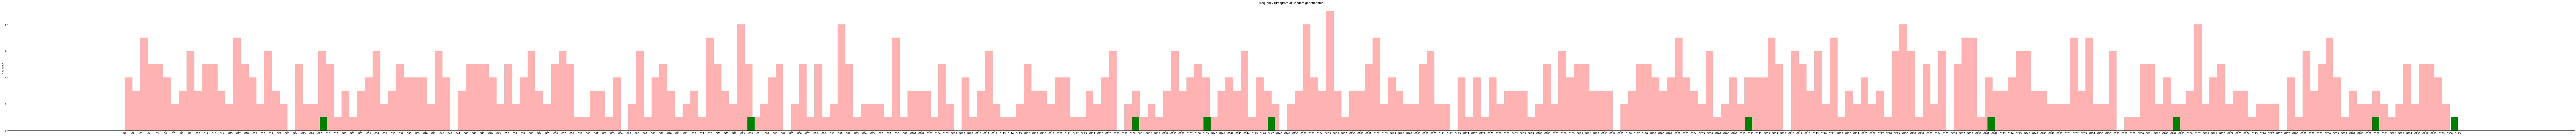

In [309]:
fig, ax = plt.subplots()

kwargs = dict(alpha=0.3, bins=300)

sorted_random_genetic_list = sort_genetic_table(random_genetic_list)
ax.hist(sorted_random_genetic_list, **dict(alpha=0.3, bins=300), color='r', label='random genetic table')
ax.hist(selected_genetic, **dict(alpha=1, bins=300), color='g', label='selected genetic table')
ax.set(title='Frequency Histogram of Random genetic table', ylabel='Frequency')
fig.savefig('Frequency Histogram of Random genetic table - Acc_not_100.png', dpi = 200)
plt.show()